In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SVM

## SVC

In [20]:
class SVC:
    def predict(self, X):
        return np.sign(X @ self.w)
    def error(self, X, y):
        return (1 - self.predict(X) * y).sum()
    def fit(self, X, y, a=0.1, n=1000):
        self.w = pd.DataFrame(np.ones((X.shape[1], 1)))
        for i in range(n):
            pred = self.predict(X)
            M_ = 1 - pred * y
            wrong_preds = (M_[M_ > 0].dropna()).index
            grad = -1 * (y.iloc[wrong_preds].T @ X.iloc[wrong_preds])
            self.w -= (a * grad).T
    def accuracy_score(self, y_, y):
        return (y_ == y).sum()/y.shape[0]
    def plot(self, X, y):
        h = 0.02
        x_min, x_max = X[0].min() - 1, X[0].max() + 1
        y_min, y_max = X[1].min() - 1, X[1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                            np.arange(y_min, y_max, h))

        Z_linear = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z_linear = Z_linear.values.reshape(xx.shape)
        plt.contourf(xx, yy, Z_linear, alpha=0.1)
        plt.scatter(X[0], X[1], c=y)
        plt.title('Linear SVM')
        plt.xlabel('Sepal Length')
        plt.ylabel('Sepal Width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.show()

In [21]:
from sklearn.datasets import make_classification

X, y = make_classification(random_state=10,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_classes=2,
                           n_clusters_per_class=1)
y[y == 0] = -1  
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [22]:
model = SVC()
model.fit(X, y, n=1000)

In [23]:
model.accuracy_score(model.predict(X), y)

0    0.97
dtype: float64

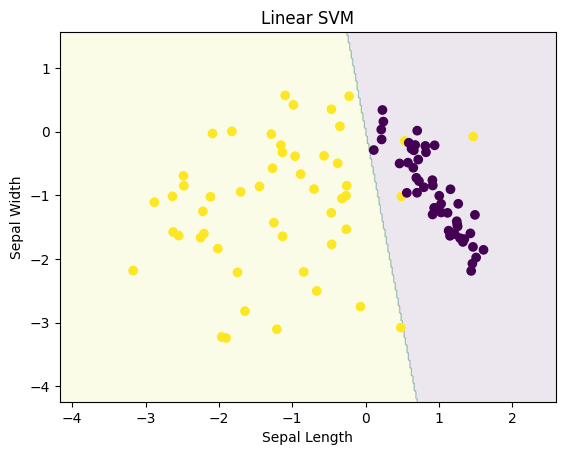

In [24]:
model.plot(X, y)

# SVR

# Логистическая регрессия

In [ ]:
class LogRegression:
    def predict_prob(self, X):
        with np.errstate(over='ignore'):
            result = 1/(1 + np.exp(-(X @ self.w)))
        return result
    def predict(self, X, wall):
        prob = self.predict_prob(X)
        prob[prob > wall] = 1
        prob[prob < wall] = -1
        return prob
    def error(self, X, y):
        return -(y * np.log(self.predict_prob(X)) + (1 - y) * np.log(self.predict_prob(-X))).sum()
    def fit(self, X, y, a=0.1, n=1000):
        self.w = pd.DataFrame(np.ones((X.shape[1], 1)))
        for i in range(n):
            grad = -(X.T @ (y - self.predict_prob(X)))
            self.w -= a * grad
    def accuracy_score(self, y, y_):
        return (y == y_).sum()/y.shape[0]
    def plot(self, X, y):
        h = 0.02
        x_min, x_max = X[0].min() - 1, X[0].max() + 1
        y_min, y_max = X[1].min() - 1, X[1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))

        Z_linear = self.predict(np.c_[xx.ravel(), yy.ravel()], wall=0.5)
        Z_linear = Z_linear.values.reshape(xx.shape)
        plt.contourf(xx, yy, Z_linear, alpha=0.1)
        plt.scatter(X[0], X[1], c=y)
        plt.title('Logistic Regression')
        plt.xlabel('Sepal Length')
        plt.ylabel('Sepal Width')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.show()


In [143]:
from sklearn.datasets import make_classification
N = 2
X, y = make_classification(random_state=1,
                           n_features=N,
                           n_informative=N,
                           n_redundant=0)
y[y == 0] = -1  
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [144]:
model = LogRegression()
model.fit(X, y, a=1, n=1000)

In [145]:
model.accuracy_score(y, model.predict(X, wall=0.5))

0    0.97
dtype: float64

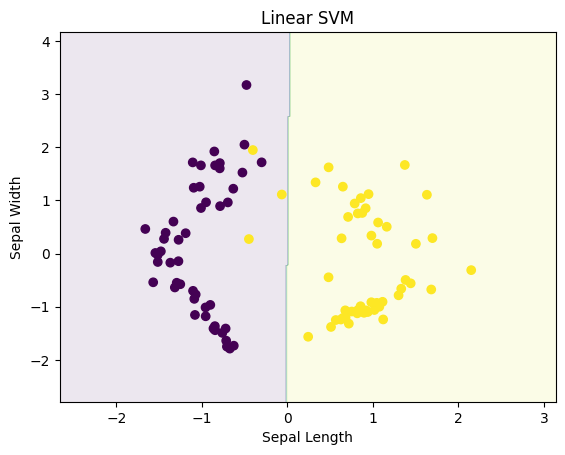

In [146]:
model.plot(X, y)